# 曲线拟合

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
# 多项式拟合

In [3]:
from numpy import polyfit,poly1d

In [4]:
x = np.linspace(-5,5,100)
y = 4* x + 1.5
noise_y = y + np.random.randn(y.shape[-1] ) * 2.5

In [5]:
x

array([-5.        , -4.8989899 , -4.7979798 , -4.6969697 , -4.5959596 ,
       -4.49494949, -4.39393939, -4.29292929, -4.19191919, -4.09090909,
       -3.98989899, -3.88888889, -3.78787879, -3.68686869, -3.58585859,
       -3.48484848, -3.38383838, -3.28282828, -3.18181818, -3.08080808,
       -2.97979798, -2.87878788, -2.77777778, -2.67676768, -2.57575758,
       -2.47474747, -2.37373737, -2.27272727, -2.17171717, -2.07070707,
       -1.96969697, -1.86868687, -1.76767677, -1.66666667, -1.56565657,
       -1.46464646, -1.36363636, -1.26262626, -1.16161616, -1.06060606,
       -0.95959596, -0.85858586, -0.75757576, -0.65656566, -0.55555556,
       -0.45454545, -0.35353535, -0.25252525, -0.15151515, -0.05050505,
        0.05050505,  0.15151515,  0.25252525,  0.35353535,  0.45454545,
        0.55555556,  0.65656566,  0.75757576,  0.85858586,  0.95959596,
        1.06060606,  1.16161616,  1.26262626,  1.36363636,  1.46464646,
        1.56565657,  1.66666667,  1.76767677,  1.86868687,  1.96

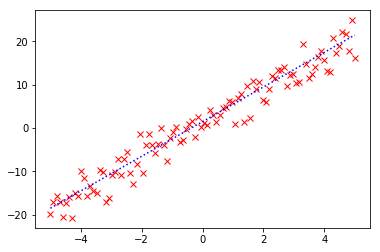

In [6]:
%matplotlib inline
p = plt.plot(x,noise_y,'rx')
p = plt.plot(x,y,'b:')

In [7]:
# 进行线性拟合，`polyfit` 是多项式拟合函数，线性拟合即一阶多项式：

In [8]:
coeff = polyfit(x,noise_y,1)
coeff

array([ 3.92257947,  1.0719364 ])

一阶多项式 $y = a_1 x + a_0$ 拟合，返回两个系数 $[a_1, a_0]$。

画出拟合曲线：

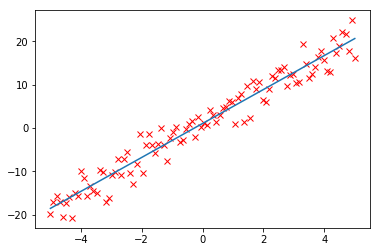

In [9]:
f = poly1d(coeff)
p = plt.plot(x, noise_y, 'rx')
p = plt.plot(x, f(x))

In [10]:
f

poly1d([ 3.92257947,  1.0719364 ])

In [11]:
print(f)

 
3.923 x + 1.072


In [12]:
# 多项式拟合正弦函数

In [13]:
x = np.linspace(-np.pi,np.pi,100)
y = np.sin(x)

In [14]:
x,y

(array([-3.14159265, -3.07812614, -3.01465962, -2.9511931 , -2.88772658,
        -2.82426006, -2.76079354, -2.69732703, -2.63386051, -2.57039399,
        -2.50692747, -2.44346095, -2.37999443, -2.31652792, -2.2530614 ,
        -2.18959488, -2.12612836, -2.06266184, -1.99919533, -1.93572881,
        -1.87226229, -1.80879577, -1.74532925, -1.68186273, -1.61839622,
        -1.5549297 , -1.49146318, -1.42799666, -1.36453014, -1.30106362,
        -1.23759711, -1.17413059, -1.11066407, -1.04719755, -0.98373103,
        -0.92026451, -0.856798  , -0.79333148, -0.72986496, -0.66639844,
        -0.60293192, -0.53946541, -0.47599889, -0.41253237, -0.34906585,
        -0.28559933, -0.22213281, -0.1586663 , -0.09519978, -0.03173326,
         0.03173326,  0.09519978,  0.1586663 ,  0.22213281,  0.28559933,
         0.34906585,  0.41253237,  0.47599889,  0.53946541,  0.60293192,
         0.66639844,  0.72986496,  0.79333148,  0.856798  ,  0.92026451,
         0.98373103,  1.04719755,  1.11066407,  1.1

In [15]:
# 最小二乘拟合
# 导入相关的模块

In [16]:
from scipy.linalg import lstsq
from scipy.stats import linregressss

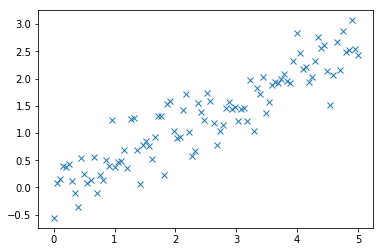

In [17]:
x = np.linspace(0,5,100)
y = 0.5 * x + np.random.randn(x.shape[-1]) * 0.35
plt.plot(x,y,'x')

In [18]:
#Scipy.linalg.lstsq 最小二乘解

In [19]:
X = np.hstack((x[:,np.newaxis], np.ones((x.shape[-1],1))))
X[1:5]

array([[ 0.05050505,  1.        ],
       [ 0.1010101 ,  1.        ],
       [ 0.15151515,  1.        ],
       [ 0.2020202 ,  1.        ]])

In [20]:
C, resid, rank, s = lstsq(X, y)
C, resid, rank, s

(array([ 0.52654881, -0.02472533]),
 11.236534511819146,
 2,
 array([ 30.23732043,   4.82146667]))

sum squared residual = 11.237
rank of the X matrix = 2
singular values of X = [ 30.23732043   4.82146667]


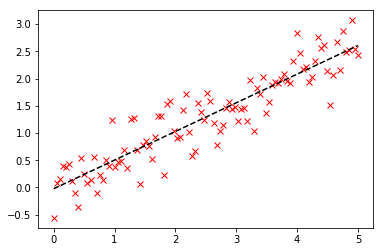

In [21]:
p = plt.plot(x, y, 'rx')
p = plt.plot(x, C[0] * x + C[1], 'k--')
print ("sum squared residual = {:.3f}".format(resid))
print ("rank of the X matrix = {}".format(rank))
print ("singular values of X = {}".format(s))

In [22]:
# Scipy.stats.linregress 线性回归

In [23]:
slope, intercept, r_value, p_value, stderr = linregress(x, y)
slope, intercept

(0.52654880553506889, -0.024725333825334816)

R-value = 0.916
p-value (probability there is no correlation) = 9.194e-41
Root mean squared error of the fit = 0.152


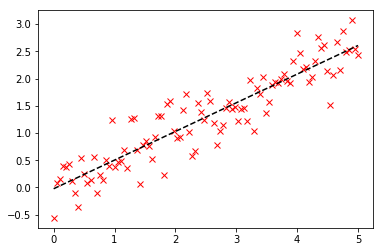

In [24]:
p = plt.plot(x, y, 'rx')
p = plt.plot(x, slope * x + intercept, 'k--')
print( "R-value = {:.3f}".format(r_value))
print ("p-value (probability there is no correlation) = {:.3e}".format(p_value))
print( "Root mean squared error of the fit = {:.3f}".format(np.sqrt(stderr)))

In [25]:
from scipy.optimize import leastsq

先定义这个非线性函数：$y = a e^{-b sin( f x + \phi)}$

In [26]:
def function(x, a , b, f, phi):
    """a function of x with four parameters"""
    result = a * np.exp(-b * np.sin(f * x + phi))
    return result

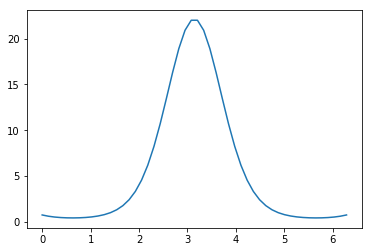

In [27]:
x = np.linspace(0, 2 * np.pi, 50)
actual_parameters = [3, 2, 1.25, np.pi / 4]
y = function(x, *actual_parameters)
p = plt.plot(x,y)

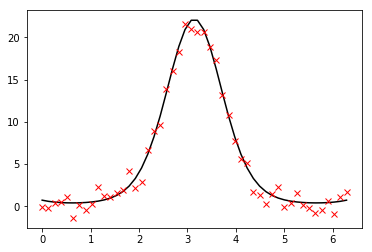

In [28]:
from scipy.stats import norm
y_noisy = y + 0.8 * norm.rvs(size=len(x))
p = plt.plot(x, y, 'k-')
p = plt.plot(x, y_noisy, 'rx')

In [29]:
# 定义误差函数，将要优化的参数放在前面：

In [30]:
def f_err(p, y, x):
    return y - function(x, *p)

In [31]:
c, ret_val = leastsq(f_err, [1, 1, 1, 1], args=(y_noisy, x))
c, ret_val

(array([ 2.33385454,  2.23476532,  1.18023886,  1.00572815]), 1)

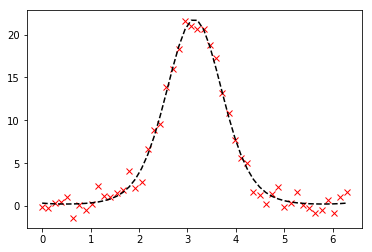

In [32]:
p = plt.plot(x, y_noisy, 'rx')
p = plt.plot(x, function(x, *c), 'k--')

In [33]:
from scipy.optimize import curve_fit

In [34]:
# 不需要定义误差函数，直接传入 `function` 作为参数：

In [35]:
p_est, err_est = curve_fit(function, x, y_noisy)

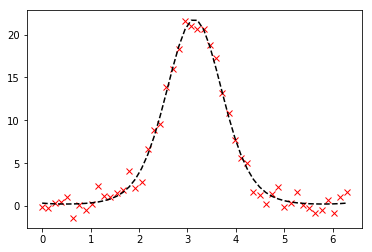

In [36]:
p = plt.plot(x, y_noisy, "rx")
p = plt.plot(x, function(x, *p_est), "k--")

In [37]:
err_est

array([[ 0.52077264, -0.22075235,  0.06753549, -0.21210239],
       [-0.22075235,  0.09390085, -0.0284417 ,  0.0893242 ],
       [ 0.06753549, -0.0284417 ,  0.00929526, -0.02919276],
       [-0.21210239,  0.0893242 , -0.02919276,  0.09189611]])

In [38]:
np.sqrt(err_est.diagonal()) / p_est

array([ 0.30920768,  0.13712064,  0.0816885 ,  0.30141716])

In [40]:
# 协方差矩阵的对角线为各个参数的方差：